## Random Forest

In [21]:
rf = RandomForestClassifier(random_state = 42)
cv_score = cross_val_score(rf, data.drop('target',axis = 1), data['target'], cv=5)
print(f'mean cross valdation score - {np.mean(cv_score)}')

mean cross valdation score - 0.880954899812345


In [22]:
rf = RandomForestClassifier(oob_score=True,random_state = 42)
rf.fit(x_train,y_train)
y_train_pred_rf = rf.predict(x_train)
y_pred_rf = rf.predict(x_test)
acc_train_rf = accuracy_score(y_train,y_train_pred_rf)
acc_test_rf = accuracy_score(y_test,y_pred_rf)
acc_oob = rf.oob_score_
print(f'Accuracy on train data : {acc_train_rf}')
print(f'Accuracy on test data : {acc_test_rf}')
print(f'accuracy on Out-of-bound data : {acc_oob}')
print('Classification Report for Random Forest')
print(classification_report(y_test,y_pred_rf))

Accuracy on train data : 1.0
Accuracy on test data : 0.9036144578313253
accuracy on Out-of-bound data : 0.9135967849966511
Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.93      0.89      0.91       117
           2       0.89      0.94      0.92       195
           3       0.84      0.83      0.83        81
           4       0.96      0.92      0.94       103

    accuracy                           0.90       498
   macro avg       0.82      0.82      0.82       498
weighted avg       0.90      0.90      0.90       498



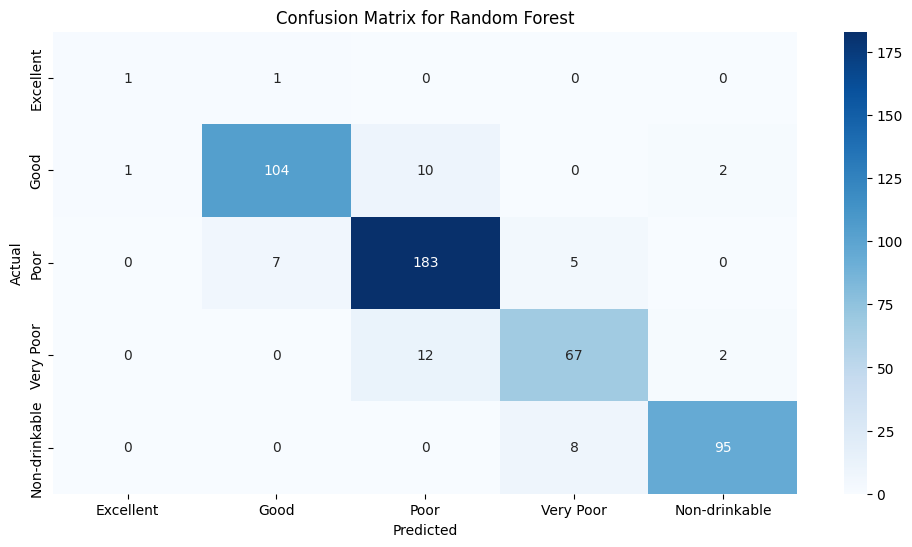

In [23]:
# Confusion metrix of test data
cm = confusion_matrix(y_test,y_pred_rf)
labels = ['Excellent','Good','Poor','Very Poor','Non-drinkable']
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

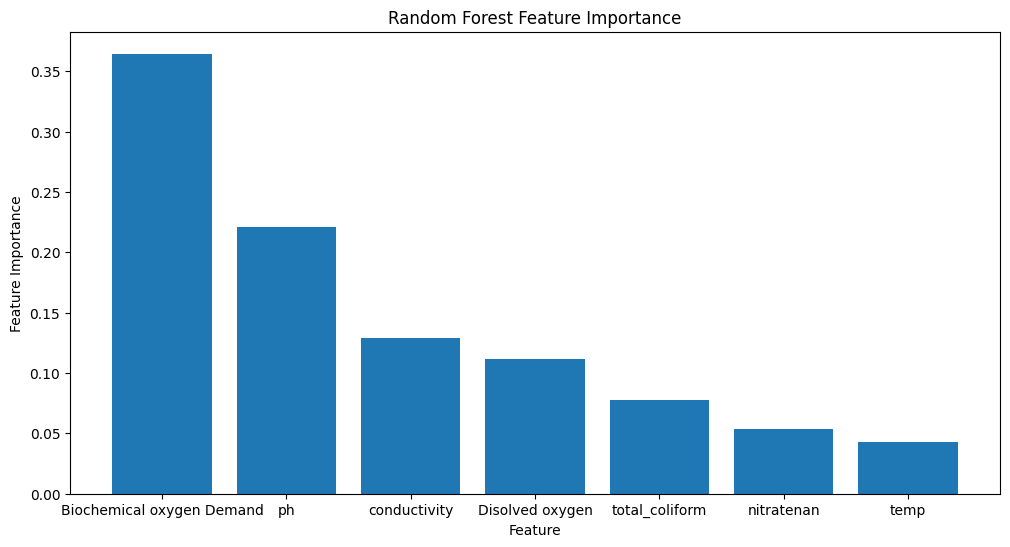

In [24]:
importances = rf.feature_importances_
# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(x_train.shape[1]), sorted_importances)
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices])
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

## Random Forest Hyperparameter Tuning

In [25]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2,20,5)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(2,10,5)]
# Method of selecting samples for training each tree
bootstrap = [True]
criterion = ['gini','entropy']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

rf = RandomForestClassifier(random_state = 42)
rf_random_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random_search.fit(x_train,y_train)


y_train_pred_rftune = rf_random_search.predict(x_train)
y_pred_rftune = rf_random_search.predict(x_test)
acc_train_rftune = accuracy_score(y_train,y_train_pred_rftune)
acc_test_rftune = accuracy_score(y_test,y_pred_rftune)

print(f'Best Parameters using Randomized search : {rf_random_search.best_params_}')
print(f'Best Score using Randomized search : {rf_random_search.best_score_}')
print(f'Accuracy on train data : {acc_train_rftune}')
print(f'Accuracy on test data : {acc_test_rftune}')
print('Classification Report for random Forest after Hypreparameter Tuning')
print(classification_report(y_test,y_pred_rftune))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters using Randomized search : {'n_estimators': 300, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': True}
Best Score using Randomized search : 0.9156000987632152
Accuracy on train data : 0.9872739450770261
Accuracy on test data : 0.9036144578313253
Classification Report for random Forest after Hypreparameter Tuning
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.94      0.89      0.91       117
           2       0.89      0.94      0.92       195
           3       0.83      0.83      0.83        81
           4       0.96      0.92      0.94       103

    accuracy                           0.90       498
   macro avg       0.82      0.82      0.82       498
weighted avg       0.90      0.90      0.90       498



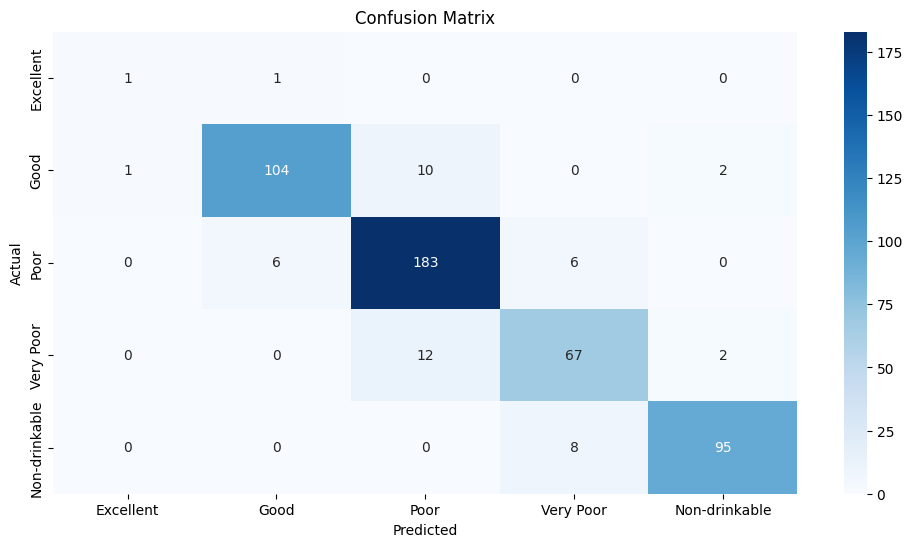

In [26]:
# Confusion metrix of test data
cm = confusion_matrix(y_test,y_pred_rftune)
labels = ['Excellent','Good','Poor','Very Poor','Non-drinkable']
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()